In [1]:
import pandas as pd
import openpyxl as op
import matplotlib.pyplot as plt

## I'll start with a simple dataframe with columns based around NBA bets, I've explained it in another repository

In [2]:
matches_df = pd.read_excel('nba_matches.xlsx', sheet_name='Export Worksheet')
matches_df.head()

,MATCH_ID,MATCH_DATE,MATCH,PREDICTED_WINNER,MATCH_VALUE,MATCH_GOT_IT
0,1,2022-12-10,MIAMI HEAT - SAN ANTONIO SPURS,MIAMI HEAT,1.11,NO
1,2,2022-12-10,WASHINGTON WIZARDS - LOS ANGELES CLIPPERS,LOS ANGELES CLIPPERS,1.53,YES
2,3,2022-12-10,INDIANA PACERS - BROOKLYN NETS,INDIANA PACERS,1.32,NO
3,4,2022-12-10,CLEVELAND CAVALIERS - OKLAHOMA CITY THUNDER,CLEVELAND CAVALIERS,1.36,YES
4,5,2022-12-10,CHICAGO BULLS - DALLAS MAVERICKS,DALLAS MAVERICKS,2.00,NO


In [3]:
matches_df = matches_df.rename(columns=str.lower)
matches_df.columns

Index(['match_id', 'match_date', 'match', 'predicted_winner', 'match_value',
       'match_got_it'],
      dtype='object')

In [4]:
matches_df.set_index('match_id', inplace=True)

In [5]:
matches_df['match_date'] = pd.to_datetime(matches_df['match_date'])
matches_df.dtypes

match_date          datetime64[ns]
match                       object
predicted_winner            object
match_value                float64
match_got_it                object
dtype: object

## After some simple clean up, I'm aggregating the successful and unsuccessful bets in separate DFs to sum up how it all went down

In [6]:
successful_bets = matches_df[matches_df['match_got_it'] == 'YES']
successful_bets.head()

,match_date,match,predicted_winner,match_value,match_got_it
match_id,,,,,
2,2022-12-10,WASHINGTON WIZARDS - LOS ANGELES CLIPPERS,LOS ANGELES CLIPPERS,1.53,YES
4,2022-12-10,CLEVELAND CAVALIERS - OKLAHOMA CITY THUNDER,CLEVELAND CAVALIERS,1.36,YES
7,2022-12-10,DENVER NUGGETS - UTAH JAZZ,DENVER NUGGETS,1.40,YES
8,2022-12-10,PORTLAND TRAIL BLAZERS - MINNESOTA TIMBERWOLVES,PORTLAND TRAIL BLAZERS,1.45,YES
10,2022-12-11,DETROIT PISTONS - LOS ANGELES LAKERS,LOS ANGELES LAKERS,1.49,YES


In [7]:
unsuccessful_bets = matches_df[matches_df['match_got_it'] == 'NO']
unsuccessful_bets.head()

,match_date,match,predicted_winner,match_value,match_got_it
match_id,,,,,
1,2022-12-10,MIAMI HEAT - SAN ANTONIO SPURS,MIAMI HEAT,1.11,NO
3,2022-12-10,INDIANA PACERS - BROOKLYN NETS,INDIANA PACERS,1.32,NO
5,2022-12-10,CHICAGO BULLS - DALLAS MAVERICKS,DALLAS MAVERICKS,2.00,NO
6,2022-12-10,GOLDEN STATE WARRIORS - BOSTON CELTICS,BOSTON CELTICS,1.67,NO
12,2022-12-11,ORLANDO MAGIC - TORONTO RAPTORS,TORONTO RAPTORS,1.36,NO


In [8]:
number_of_bets = len(matches_df['match_got_it'])
number_of_unsuc_bets = len(unsuccessful_bets['match_got_it'])
number_of_succ_bets = len(successful_bets['match_got_it'])
print("With a total number of {} bets, {} of them were successful and {} of them were unsuccessful".format(number_of_bets, number_of_succ_bets, number_of_unsuc_bets))

With a total number of 766 bets, 471 of them were successful and 294 of them were unsuccessful


## And let's visualize it!

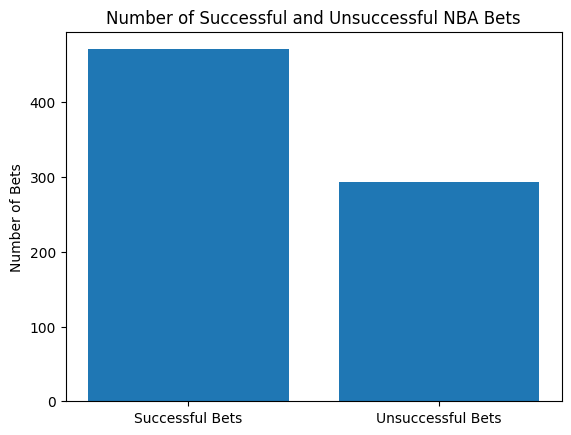

In [9]:
fig, ax = plt.subplots()
ax.bar(['Successful Bets', 'Unsuccessful Bets'], [number_of_succ_bets, number_of_unsuc_bets])
ax.set_ylabel('Number of Bets')
ax.set_title('Number of Successful and Unsuccessful NBA Bets')
plt.show()

## Let's see if the average value differs for successful and unsuccessful bets

In [10]:
avg_value_unsuc = round(unsuccessful_bets['match_value'].mean(),2)
avg_value_suc = round(successful_bets['match_value'].mean(),2)
print('An average value of a successful NBA bet is {} and an average value of an unsuccessful one is {}'.format(avg_value_suc, avg_value_unsuc))

An average value of a successful NBA bet is 1.54 and an average value of an unsuccessful one is 1.83


In [11]:
grouped_successful_bets = successful_bets.groupby('predicted_winner').agg({'match_value':'mean'})
grouped_unsuccessful_bets = unsuccessful_bets.groupby('predicted_winner').agg({'match_value':'mean'})

## And let's create some more visualizations, based around average value for specific teams

<function matplotlib.pyplot.show(close=None, block=None)>

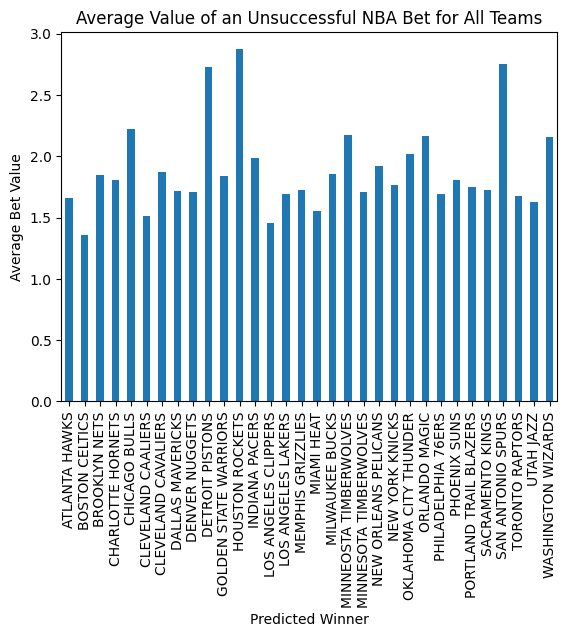

In [12]:
grouped_unsuccessful_bets.plot(kind='bar', legend=None)
plt.title('Average Value of an Unsuccessful NBA Bet for All Teams')
plt.xlabel('Predicted Winner')
plt.ylabel('Average Bet Value')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

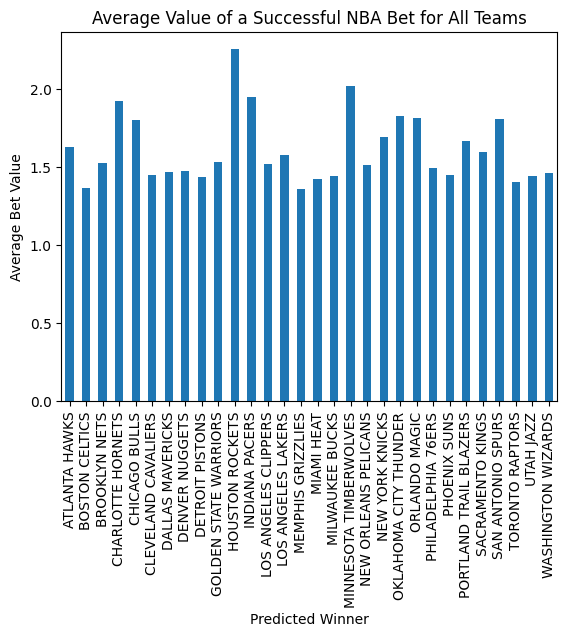

In [13]:
grouped_successful_bets.plot(kind='bar', legend=None)
plt.title('Average Value of a Successful NBA Bet for All Teams')
plt.xlabel('Predicted Winner')
plt.ylabel('Average Bet Value')
plt.show

## Now, I want to see the data that will sum the total of successful bets for all 30 teams. Then I'll be able to check which team had the highest amount of successful bets

In [14]:
high_volume = matches_df[matches_df['match_got_it'] == 'YES'].groupby('predicted_winner').count()
high_volume.head(10)

,match_date,match,match_value,match_got_it
predicted_winner,,,,
ATLANTA HAWKS,14,14,14,14
BOSTON CELTICS,25,25,25,25
BROOKLYN NETS,16,16,16,16
CHARLOTTE HORNETS,3,3,3,3
CHICAGO BULLS,11,11,11,11
CLEVELAND CAVALIERS,32,32,32,32
DALLAS MAVERICKS,17,17,17,17
DENVER NUGGETS,30,30,30,30
DETROIT PISTONS,1,1,1,1


In [15]:
top_team = high_volume.idxmax().iloc[0]
top_team_rows = matches_df[matches_df['predicted_winner'] == top_team]
no_of_successful_bets = (top_team_rows['match_got_it'] == 'YES').sum()

In [16]:
bucks = successful_bets[successful_bets['predicted_winner'] == 'MILWAUKEE BUCKS']
bucks_value = bucks['match_value'].mean()
bucks_bets_count = (matches_df['predicted_winner'] == 'MILWAUKEE BUCKS').sum()
print('The number of successful bets for {} is {} out of {} with an average value of {}'.format(top_team, no_of_successful_bets, bucks_bets_count, round(bucks_value,2)))

The number of successful bets for MILWAUKEE BUCKS is 34 out of 48 with an average value of 1.44


## And now the opposite, let's sum the unsuccessful ones

In [17]:
low_volume = matches_df[matches_df['match_got_it'] == 'NO'].groupby('predicted_winner').count()
low_volume.head(10)

,match_date,match,match_value,match_got_it
predicted_winner,,,,
ATLANTA HAWKS,9,9,9,9
BOSTON CELTICS,14,14,14,14
BROOKLYN NETS,9,9,9,9
CHARLOTTE HORNETS,2,2,2,2
CHICAGO BULLS,11,11,11,11
CLEVELAND CAALIERS,1,1,1,1
CLEVELAND CAVALIERS,12,12,12,12
DALLAS MAVERICKS,17,17,17,17
DENVER NUGGETS,13,13,13,13


In [18]:
bust_team = low_volume.idxmax().iloc[0]
bust_team_rows = matches_df[matches_df['predicted_winner'] == bust_team]
no_of_unsuccessful_bets = (bust_team_rows['match_got_it'] == 'NO').sum()

In [19]:
mavericks = unsuccessful_bets[unsuccessful_bets['predicted_winner'] == 'DALLAS MAVERICKS']
mavericks_value = mavericks['match_value'].mean()
mavericks_bets_count = (matches_df['predicted_winner'] == 'DALLAS MAVERICKS').sum()
print('The number of unsuccessful bets for {} is {} out of {} with an average value of {}'.format(bust_team, no_of_unsuccessful_bets, mavericks_bets_count, round(mavericks_value,2)))

The number of unsuccessful bets for DALLAS MAVERICKS is 17 out of 34 with an average value of 1.72


## The last thing I want to do is to calculate the following. If the bets were real, and I was placing, let's say, $20 on them on a daily basis, would I win something or end up totally behind? Let's group the data by days again and see if there were any days when all of the bets were successful - it means payday

In [20]:
grouped_daily = matches_df.groupby('match_date')

bets_by_day = grouped_daily['match_got_it'].apply(lambda x: (x == 'YES').all()).reset_index(name='all_got_it')

In [21]:
successful_days = bets_by_day[bets_by_day['all_got_it'] == True]
successful_days

,match_date,all_got_it
11,2022-12-22,True
37,2023-01-19,True
59,2023-02-12,True
101,2023-04-01,True


In [22]:
days_count = (successful_days['all_got_it'] == True).sum()
days_count

4

In [23]:
days_list = (successful_days['match_date']).tolist()

In [24]:
if days_count > 0:
    print("You've had {} days when all of your bets were successful. Payday! You've hit all bets on: {}".format(days_count, days_list))
else:
    print("Sheesh, you've had 0 days when all of your bets were successful")

You've had 4 days when all of your bets were successful. Payday! You've hit all bets on: [Timestamp('2022-12-22 00:00:00'), Timestamp('2023-01-19 00:00:00'), Timestamp('2023-02-12 00:00:00'), Timestamp('2023-04-01 00:00:00')]


In [25]:
def payday(df):
    bet_income = 0
    
    # I've already got the dataframe grouped by each day, so let's iterate over each group
    for date, group in df:
        
        # And the main story here - let's check if all of the bets placed on a given day were successful
        if all(group['match_got_it'] == 'YES'):
            
            # Let's multiply the value of them bets and if all of them were successful,
            # let's multiply it again with 20 dollars 
            total_value = round((group['match_value'] * 20).sum(),2)
            bet_income += total_value
        
        else:
            
            # If not, I've lost 20 bucks :<
            bet_income -= 20
    return round(bet_income,2)

In [26]:
print("If all of those bets were real and I'd been placing $20 each day on them, I'd earn ${}".format(payday(grouped_daily)))

If all of those bets were real and I'd been placing $20 each day on them, I'd earn $-1686.4
